#Election Mining

> Campaigns are moving away from the meaningless labels of pollsters and newsweeklies — “Nascar dads” and “waitress moms” — and moving toward treating each voter as a separate person. In 2012 you didn’t just have to be an African-American from Akron or a suburban married female age 45 to 54. More and more, the information age allows people to be complicated, contradictory and unique. New technologies and an abundance of data may rattle the senses, but they are also bringing a fresh appreciation of the value of the individual to American politics.
    - Ethan Roeder, “I Am Not Big Brother” http://www.nytimes.com/2012/12/06/opinion/i-am-not-big-brother.html?_r=0.


In [106]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We'll be using the MovieLens data set with 100K ratings from http://grouplens.org/datasets/movielens/. There you can find much bigger sets. You can download it at http://files.grouplens.org/datasets/movielens/ml-100k.zip. 

In the midst of writing this, I discovered a great blog post using `pandas` on the same data: http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/. The approach and tools are slightly different. Worth checking out!


In [107]:
ls

05_SQL_in_Python.ipynb              auto-mpg.csv
2015_08_03_tutorial_WU.ipynb        ml-100k/
2015_08_03_tutorial_WU_2.ipynb      mondial-inputs-postgresql-2010.sql
2015_08_05_tutorial_WU.ipynb        mondial-schema-postgresql-2010.sql
2015_08_05_tutorial_WU_2.ipynb      pandas-skeleton-02.ipynb
Database_Homework_4_Chen.ipynb      pandas-skeleton-02_Chen.ipynb
HMXPC_13.csv*                       pandas-skeleton-02_Situan.ipynb
Homework_4.ipynb                    pandas-skeleton-02_Wong.ipynb
Homework_4_Wu.ipynb                 pandas-skeleton.ipynb


In [108]:
!cat ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

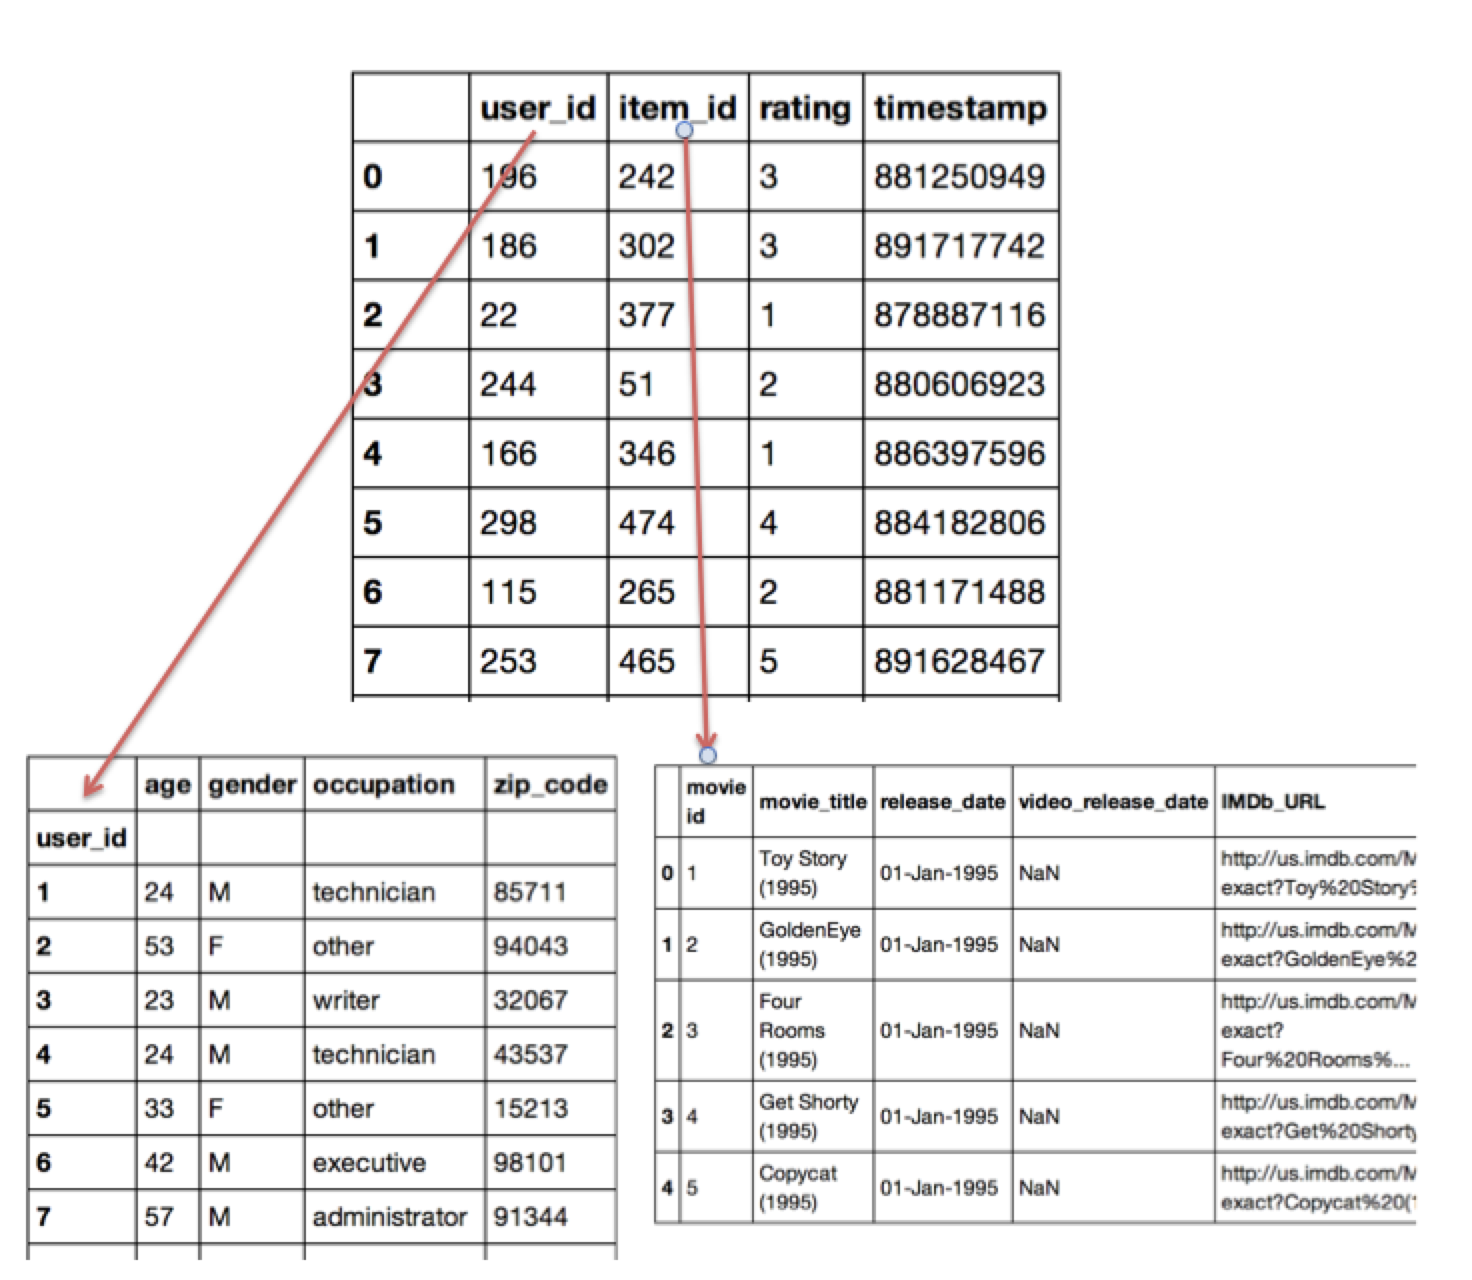

In [109]:
from IPython.display import Image
Image("http://imgur.com/ZhpRFTj.png")

In [110]:
films=pd.read_csv('./ml-100k/u.item', sep="|", names=["movie id", "movie_title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action","Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])
labels_films=["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action","Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

users=pd.read_csv('./ml-100k/u.user', sep="|", names=["user_id", "age", "gender","occupation","zip_code"], index_col="user_id")
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [127]:
# the seperation is a tab
individual_ratings = pd.read_csv('./ml-100k/u.data', sep="\t", names=["user_id", "item_id", "rating", "timestamp"])
individual_ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [128]:
pd.to_datetime(individual_ratings["timestamp"], unit = "s")

0    1997-12-04 15:55:49
1    1998-04-04 19:22:22
2    1997-11-07 07:18:36
3    1997-11-27 05:02:03
4    1998-02-02 05:33:16
5    1998-01-07 14:20:06
6    1997-12-03 17:51:28
7    1998-04-03 18:34:27
8    1998-02-01 09:20:17
9    1997-12-31 21:16:53
10   1997-11-12 22:07:14
11   1997-11-17 15:38:45
12   1997-10-05 09:05:40
13   1998-03-27 21:59:54
14   1998-02-21 23:40:57
...
99985   1998-01-03 01:01:34
99986   1997-11-29 17:24:48
99987   1998-04-01 04:50:12
99988   1998-04-10 20:49:04
99989   1998-02-28 03:45:03
99990   1997-12-17 20:01:37
99991   1998-04-16 00:10:37
99992   1997-10-18 01:14:45
99993   1997-12-06 00:12:30
99994   1997-11-20 20:16:16
99995   1997-11-22 05:10:44
99996   1997-11-17 19:39:03
99997   1997-09-20 22:49:55
99998   1997-12-17 22:52:36
99999   1997-11-19 17:13:03
Name: timestamp, Length: 100000, dtype: datetime64[ns]

In [129]:
individual_ratings["timestamp"] = pd.to_datetime(individual_ratings["timestamp"], unit = "s")

In [130]:
individual_ratings

,user_id,item_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16
5,298,474,4,1998-01-07 14:20:06
6,115,265,2,1997-12-03 17:51:28
7,253,465,5,1998-04-03 18:34:27
8,305,451,3,1998-02-01 09:20:17
9,6,86,3,1997-12-31 21:16:53


In [131]:
users.ix[196]

age               49
gender             M
occupation    writer
zip_code       55105
Name: 196, dtype: object

In [132]:
films.ix[242]

movie id                                                            243
movie_title                                        Jungle2Jungle (1997)
release_date                                                07-Mar-1997
video_release_date                                                  NaN
IMDb_URL              http://us.imdb.com/M/title-exact?Jungle2Jungle...
unknown                                                               0
Action                                                                0
Adventure                                                             0
Animation                                                             0
Children's                                                            1
Comedy                                                                1
Crime                                                                 0
Documentary                                                           0
Drama                                                           

In [133]:
users.ix[42]

age                      30
gender                    M
occupation    administrator
zip_code              17870
Name: 42, dtype: object

### What did user 42 rate?

In [134]:
users.ix[42]

age                      30
gender                    M
occupation    administrator
zip_code              17870
Name: 42, dtype: object

In [135]:
individual_ratings.ix[42]

user_id                      201
item_id                      979
rating                         2
timestamp    1998-01-06 19:17:13
Name: 42, dtype: object

In [137]:
user42 = individual_ratings [individual_ratings['user_id']==42]
user42

,user_id,item_id,rating,timestamp
58,42,423,5,1997-12-03 00:08:07
87,42,403,3,1997-12-03 00:24:44
111,42,96,5,1997-12-02 23:59:38
166,42,794,3,1997-12-03 00:20:25
310,42,546,3,1997-12-02 23:36:57
638,42,274,5,1997-12-02 23:36:57
659,42,588,5,1997-12-03 00:15:47
754,42,44,3,1997-12-03 00:22:28
778,42,1028,4,1997-12-02 23:41:12
871,42,625,3,1997-12-03 00:27:53


In [138]:
user42['rating'].mean()

3.7267759562841531

In [139]:
users.groupby(['occupation','gender']).mean()

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [140]:
films.head()

,movie id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [141]:
individual_ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [142]:
# reshape with Pivot

In [146]:
ratings = individual_ratings.pivot(index='user_id', columns='item_id',values='rating')
ratings

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,NaN,NaN,NaN,NaN,NaN,2,4,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,5,NaN,NaN,5,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
ratings.mean(axis=0).head()

item_id
1          3.878319
2          3.206107
3          3.033333
4          3.550239
5          3.302326
dtype: float64

In [155]:
ratings.mean(axis=1).head()

user_id
1          3.610294
2          3.709677
3          2.796296
4          4.333333
5          2.874286
dtype: float64

In [149]:
non_crap = ratings.mean(axis = 0)>4
non_crap

item_id
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12          True
13         False
14         False
15         False
...
1668       False
1669       False
1670       False
1671       False
1672       False
1673       False
1674       False
1675       False
1676       False
1677       False
1678       False
1679       False
1680       False
1681       False
1682       False
Length: 1682, dtype: bool

In [152]:
non_crap.head()

item_id
1          False
2          False
3          False
4          False
5          False
dtype: bool

In [157]:
ratings[non_crap]

/Users/jiachuan/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1808: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,5,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,5,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,4,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,2,NaN,4,4,NaN,NaN,4,NaN,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,5,3,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
#ratings.loc[:, non_crap]
ratings.loc[:, non_crap].head()

item_id,12,22,23,45,48,50,56,59,60,64,...,1449,1467,1500,1524,1536,1594,1599,1639,1642,1653
user_id,,,,,,,,,,,,,,,,,,,,,
1,5,4,4,5,5,5,4,5,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
haters = 

In [ ]:
suckers = ratings.mean(axis = 0)>4

In [159]:
users.ix[4]

age                   24
gender                 M
occupation    technician
zip_code           43537
Name: 4, dtype: object